In [1]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10.0,8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
#load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
#rain data
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
print("Shape of test : {0},{1}".format(test.shape[0],test.shape[1]))
print("Shape of train : {0},{1}".format(train.shape[0],train.shape[1]))

Shape of test : 1459,80
Shape of train : 1460,81


In [6]:
#check missing values
missing = train.isnull().sum()/len(train)
missing=missing[missing>0]
missing.sort_values(ascending=False,inplace=True)
missing

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [7]:
missing = missing.to_frame()
missing.columns = ['count']
missing.index.names=['Name']
missing['Name']=missing.index

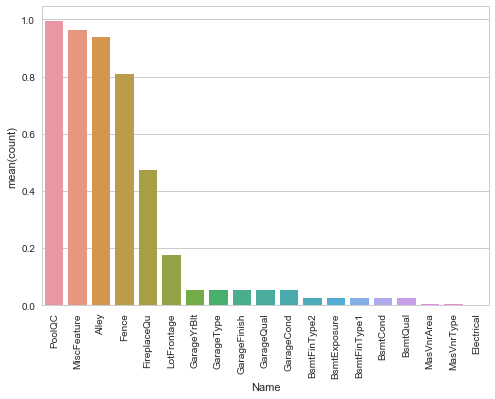

In [8]:
#plotting missing values
sns.set(style="whitegrid",color_codes=True)
sns.barplot(x='Name',y='count',data=missing)
plt.xticks(rotation=90)
sns.plt.show()

In [39]:
numeric_data=train.select_dtypes(exclude=['object'])
categ_data=train.select_dtypes(include=['object'])
del numeric_data['Id']

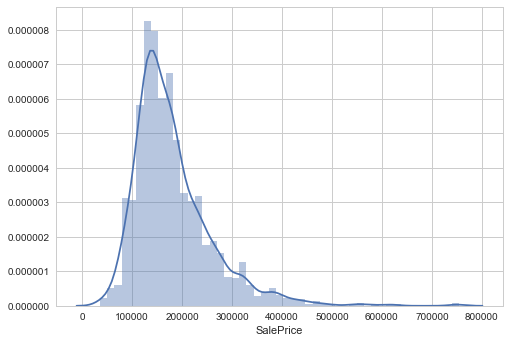

In [40]:
#Distribution of Target Price
sns.distplot(train['SalePrice'])

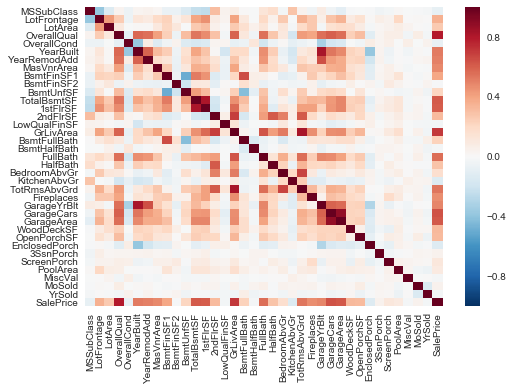

In [41]:
#Correlation Plot
corr=numeric_data.corr()
sns.heatmap(corr)

Instead of dropping features as Lasso can handle that, we'll focus more on filling the null values and creating new features

In [42]:
alldata=train.append(test)

In [43]:
numeric_data=alldata.select_dtypes(exclude=['object'])
categ_data=alldata.select_dtypes(include=['object'])

In [52]:
numeric_data.isnull().sum().sort_values(ascending=False)[:12] 
#We checked the complete list had only 3 variables with null values

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
GarageCars         1
TotalBsmtSF        1
BsmtFinSF1         1
BsmtFinSF2         1
GarageArea         1
BsmtUnfSF          1
dtype: int64

In [59]:
categ_data.isnull().sum().sort_values(ascending=False)[:23]

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Functional         2
Utilities          2
Exterior1st        1
KitchenQual        1
Electrical         1
SaleType           1
Exterior2nd        1
dtype: int64

In [111]:
qual_dict = {np.nan: 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}
alldata['PoolQC'].fillna('No',inplace=True) # No pool
alldata['MiscFeature'].fillna('No',inplace=True)#No feature
alldata['Alley'].fillna('No',inplace=True)#No feature
alldata['Fence'].fillna('No',inplace=True)#No feature
QualFeatures = np.array(['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])
for i in QualFeatures:
    alldata[i]=alldata[i].map(qual_dict)
finish_dict = {np.nan:0,"Unf":1,"Rfn":2,"Fin":3}
alldata['GarageFinish']=alldata['GarageFinish'].map(finish_dict)
alldata['GarageType'].fillna('No',inplace=True)
alldata['BsmtExposure']=alldata['BsmtExposure'].map({np.nan:0,"No":1,"Mn":2,"Av":3,"Gd":4})
alldata['BsmtFinType2']=alldata['BsmtFinType2'].map({np.nan:0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6})
alldata['BsmtFinType1']=alldata['BsmtFinType1'].map({np.nan:0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6})
alldata['MasVnrType']=alldata['MasVnrType'].map({"BrkCmn":1,"None":2,"BrkFace":3,"Unkown":4,"Stone":5}) #Using next pivot table


In [84]:
train['MasVnrType'].fillna("Unknown",inplace=True)
pivot=train.pivot_table(index='MasVnrType',values='SalePrice',aggfunc=np.median)
pivot.sort_values(by='SalePrice',ascending=False)

,SalePrice
MasVnrType,
Stone,246839
Unknown,203287
BrkFace,181000
None,143000
BrkCmn,139000


In [100]:
train['MSZoning'].fillna("Unknown",inplace=True)
pivot=train.pivot_table(index='MSZoning',values='SalePrice',aggfunc=np.median)
pivot.sort_values(by='SalePrice',ascending=False)

,SalePrice
MSZoning,
FV,205950
RL,174000
RH,136500
RM,120500
C (all),74700


In [116]:
categ_data=alldata.select_dtypes(include=['object'])
categ_data.isnull().sum().sort_values(ascending=False)[:7]

MSZoning       4
Utilities      2
Functional     2
SaleType       1
Electrical     1
Exterior1st    1
Exterior2nd    1
dtype: int64

In [112]:
for key,x in train['MSZoning'].groupby(train['Neighborhood']):
    print(key,stats.mode(x)[0])

Blmngtn ['RL']
Blueste ['RM']
BrDale ['RM']
BrkSide ['RM']
ClearCr ['RL']
CollgCr ['RL']
Crawfor ['RL']
Edwards ['RL']
Gilbert ['RL']
IDOTRR ['RM']
MeadowV ['RM']
Mitchel ['RL']
NAmes ['RL']
NPkVill ['RL']
NWAmes ['RL']
NoRidge ['RL']
NridgHt ['RL']
OldTown ['RM']
SWISU ['RL']
Sawyer ['RL']
SawyerW ['RL']
Somerst ['FV']
StoneBr ['RL']
Timber ['RL']
Veenker ['RL']


C:\Users\manshubh.singh\AppData\Local\conda\conda\envs\my_root\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [160]:
alldata.loc[alldata.MSZoning.isnull()][['MSZoning','Neighborhood']]

,MSZoning,Neighborhood
455,NaN,IDOTRR
756,NaN,IDOTRR
790,NaN,IDOTRR
1444,NaN,Mitchel


In [175]:
alldata.loc[alldata.MSZoning.isnull()][['MSZoning','Neighborhood']]['MSZoning']=pd.Series(['x','x','x','x'])

In [176]:
alldata.loc[alldata.MSZoning.isnull()][['MSZoning','Neighborhood']]

,MSZoning,Neighborhood
455,NaN,IDOTRR
756,NaN,IDOTRR
790,NaN,IDOTRR
1444,NaN,Mitchel


0    RL
1    RL
2    RL
3    RL
4    RL
Name: MSZoning, dtype: object